In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
titanic_df = pd.read_csv('./train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

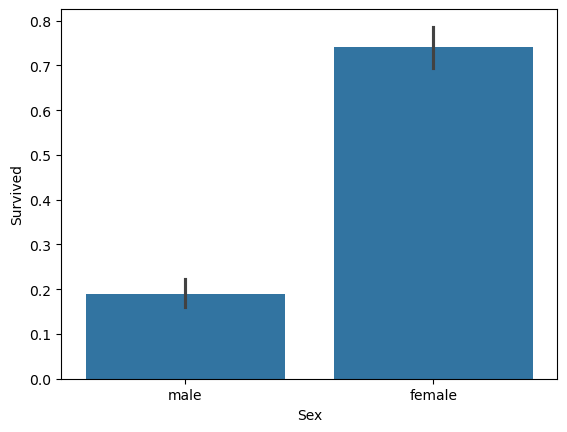

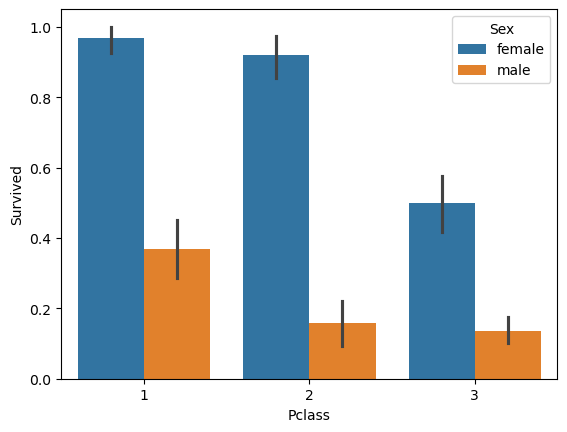

In [6]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.show()
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)
plt.show()

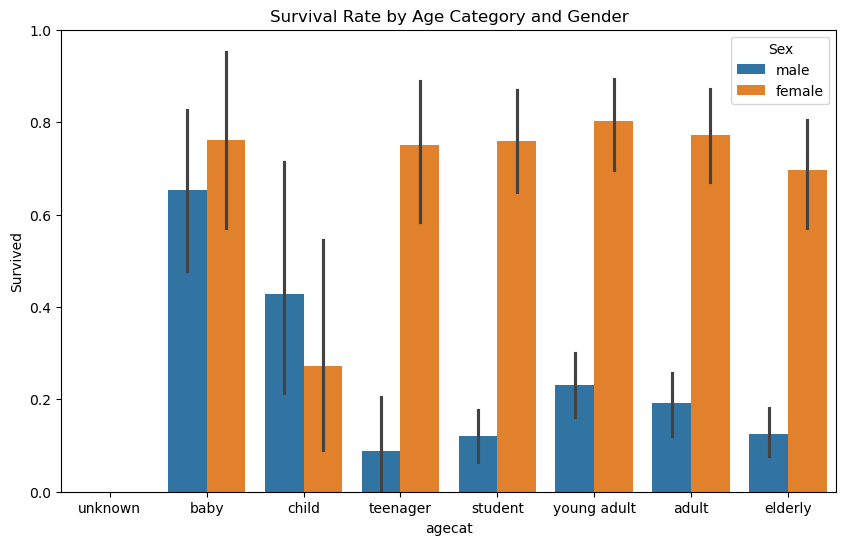

In [7]:
groupname = ["unknown", "baby", "child", "teenager", "student", "young adult", "adult", "elderly"]

# 나이에 따라 카테고리 설정 함수
def categorize_age(age):
    if age < -1:
        return "unknown"
    elif age <= 5:
        return "baby"
    elif age <= 12:
        return "child"
    elif age <= 18:
        return "teenager"
    elif age <= 25:
        return "student"
    elif age <= 35:
        return "young adult"
    elif age <= 60:
        return "adult"
    else:
        return "elderly"

# agecat 열 추가
titanic_df['agecat'] = titanic_df['Age'].apply(lambda age: categorize_age(age))

# Barplot 시각화
plt.figure(figsize=(10, 6))
sns.barplot(
    x='agecat', 
    y='Survived', 
    hue='Sex', 
    data=titanic_df, 
    order=groupname
)
plt.title("Survival Rate by Age Category and Gender")
plt.show()

# agecat 열 제거
titanic_df.drop('agecat', axis=1, inplace=True)